In [1]:
#IMDB-Movie-Data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
data = pd.read_csv(r'C:\Users\sivasai dharmateja\Downloads\IMDB-Movie-Data.csv')

data.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
# to display last rows of dataset leaving top3 rows from starting

data.tail(1)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [10]:
data.shape

(1000, 12)

In [12]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [13]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [14]:
# to see all the informations of columns in dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Data Cleaning

In [16]:
# Checking missing values

data.isnull().sum().sort_values(ascending=False)

Revenue (Millions)    128
Metascore              64
Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
dtype: int64

<AxesSubplot:>

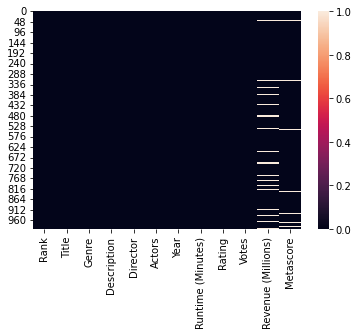

In [17]:
# visualising missing values

sns.heatmap(data.isnull())

In [18]:
# checking how much % of missing values present in dataset


data.isnull().sum() * 100 / len(data)

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

In [19]:
# drop all missing values from dataset 


data.dropna(how='any',inplace=True)

As we have dropped rows containing missing values, only 838 rows are left in the dataset now.

In [20]:
data.shape

(838, 12)

In [21]:
# checking if any duplicate data present in dataset
# approach 1

data[data.duplicated()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


In [22]:
# checking duplicate data
# approach 2

data.duplicated().any()

False

DATA ANALYSIS

In [24]:
# Showing title of movies which are having runtime of more than or equal to 180 minutes

data[data['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

In [25]:
# Showing in which year there was highest average voting
# approach 1

data.groupby('Year')['Votes'].mean().sort_values( ascending = False)

Year
2012    290861.483871
2006    277232.219512
2009    267180.577778
2008    266580.145833
2007    266530.704545
2010    261082.929825
2011    259254.736842
2013    225531.892857
2014    211926.881720
2015    129512.651376
2016     68437.823232
Name: Votes, dtype: float64

In [26]:
data.groupby('Year')['Votes'].mean().max()

290861.48387096776

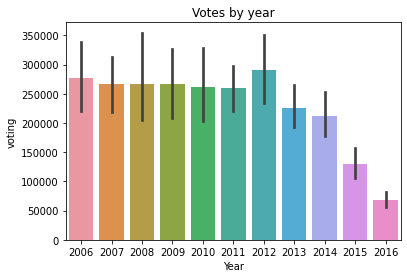

In [29]:
#Visualising highest average voting
sns.barplot(x='Year' , y='Votes' , data=data)
plt.title('Votes by year')
plt.ylabel('voting')
plt.show()

In the above bar plot, it is visible that highest voting has been performed in the year 2012

In [30]:
# Year having highest average revenue

data.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

Year
2009    115.742000
2012    110.103065
2010    105.081579
2008     97.525417
2011     93.703333
2007     93.074091
2013     88.084643
2006     87.255610
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue (Millions), dtype: float64

Text(0.5, 1.0, 'Revenue by year')

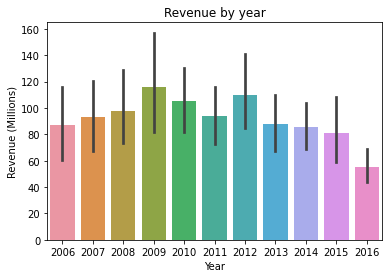

In [31]:
sns.barplot(x='Year', y='Revenue (Millions)', data =data)
plt.title('Revenue by year')

In [32]:
# average rating for each director

data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

Director
Christopher Nolan                   8.68
Olivier Nakache                     8.60
Makoto Shinkai                      8.60
Florian Henckel von Donnersmarck    8.50
Aamir Khan                          8.50
                                    ... 
Sam Taylor-Johnson                  4.10
Joey Curtis                         4.00
George Nolfi                        3.90
James Wong                          2.70
Jason Friedberg                     1.90
Name: Rating, Length: 524, dtype: float64

In [33]:
data['Director'].value_counts()

Ridley Scott          8
Paul W.S. Anderson    6
David Yates           6
Michael Bay           6
Antoine Fuqua         5
                     ..
Kyle Balda            1
Chris Renaud          1
Peter Billingsley     1
Lee Toland Krieger    1
Nima Nourizadeh       1
Name: Director, Length: 524, dtype: int64

In [34]:
top10_movies=data.sort_values(by='Runtime (Minutes)',ascending=False) [['Title' , 'Runtime (Minutes)']].head(10)
top10_movies

,Title,Runtime (Minutes)
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
267,Cloud Atlas,172
430,3 Idiots,170
75,Pirates of the Caribbean: At World's End,169
36,Interstellar,169
271,The Hobbit: An Unexpected Journey,169
425,The Curious Case of Benjamin Button,166
126,Transformers: Age of Extinction,165


Text(0.5, 1.0, 'Top 10 lengthy movies')

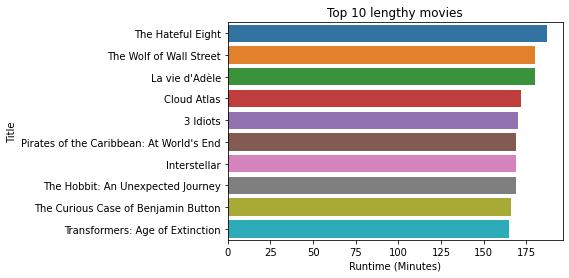

In [35]:
sns.barplot(y='Title', x='Runtime (Minutes)', data= top10_movies)
plt.title('Top 10 lengthy movies')

In [36]:
# top 10 lengthy movies but without pre built index and treating Title as index

top10=data.sort_values(by='Runtime (Minutes)',ascending=False) [['Title' , 'Runtime (Minutes)']].head(10).set_index('Title')
top10

,Runtime (Minutes)
Title,
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Cloud Atlas,172
3 Idiots,170
Pirates of the Caribbean: At World's End,169
Interstellar,169
The Hobbit: An Unexpected Journey,169
The Curious Case of Benjamin Button,166


Text(0.5, 1.0, 'Top 10 lengthy movies')

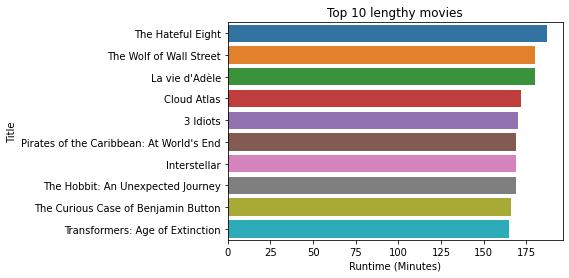

In [37]:
# using index function as title column becoame index in ths scenario

sns.barplot(x='Runtime (Minutes)', y=top10.index , data= top10)
plt.title('Top 10 lengthy movies')

In [38]:
# No. of movies each year
# Approach 1


data.groupby('Year')['Rank'].count().sort_values(ascending=False)

Year
2016    198
2015    109
2014     93
2013     84
2012     62
2010     57
2011     57
2008     48
2009     45
2007     44
2006     41
Name: Rank, dtype: int64

In [39]:
# Approach 2


data['Year'].value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

Text(0.5, 1.0, 'Count of Movies by Year')

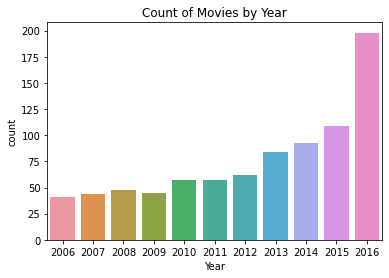

In [42]:
sns.countplot(x='Year',data=data)
plt.title("Count of Movies by Year")